In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import causaldata 
from causalgraphicalmodels import CausalGraphicalModel
import warnings
warnings.simplefilter("ignore", FutureWarning)

**Latar Belakang**


Dalam konteks keterwakilan politik, penting untuk memahami bagaimana kehadiran legislator dari kelompok minoritas, seperti legislator berkulit hitam, dapat memengaruhi keterlibatan komunitas mereka. Di wilayah tertentu, legislator berkulit hitam mungkin memainkan peran simbolis dan praktis dalam meningkatkan partisipasi politik, khususnya di kalangan komunitas yang terpinggirkan.



In [9]:
black_politician = causaldata.black_politicians.load_pandas().data
black_politician.head()

,leg_black,treat_out,responded,totalpop,medianhhincom,black_medianhh,white_medianhh,blackpercent,statessquireindex,nonblacknonwhite,urbanpercent,leg_senator,leg_democrat,south
0,0,0,0,1.5873,5.0625,2.6814,2.6586,0.007119,0.227,0,0.695601,0,0,0
1,0,0,1,1.6218,4.9713,2.7126,2.6619,0.005796,0.227,0,0.618073,0,0,0
2,0,0,1,1.6710,6.9646,2.3087,2.9973,0.012029,0.227,0,0.824331,0,0,0
3,0,0,1,1.6122,4.1811,2.4668,2.4887,0.004280,0.227,1,0.000000,0,0,0
4,0,1,1,1.5622,3.1152,2.1490,2.0597,0.008258,0.227,1,0.000000,0,1,0


Data Description:

- leg_black: Legislator berkulit hitam (1: Ya, 0: Tidak).
- treat_out: Variabel perlakuan (kemungkinan intervensi).
- responded: Respon (hasil akhir).
- otalpop: Total populasi.
- medianhhincom: Pendapatan rumah tangga median.
- black_medianhh: Pendapatan median rumah tangga kulit hitam.
- white_medianhh: Pendapatan median rumah tangga kulit putih.
- blackpercent: Persentase penduduk kulit hitam.
- statessquireindex: Indeks status negara bagian.
- nonblacknonwhite: Populasi bukan kulit hitam dan bukan kulit putih.
- urbanpercent: Persentase wilayah urban.
- leg_senator: Legislator senator (1: Ya, 0: Tidak).
- leg_democrat: Legislator Demokrat (1: Ya, 0: Tidak).
- south: Indikator wilayah Selatan (1: Ya, 0: Tidak).

**Pertanyaan Kausal**
Apakah kehadiran legislator berkulit hitam meningkatkan keterlibatan pemilih, yang diukur melalui respons mereka terhadap interaksi politik?

**Variabel Utama**
- Treatment (Variabel Bebas):leg_black: Apakah legislator berkulit hitam (1 = Ya, 0 = Tidak).
- Outcome (Variabel Terikat):responded: Apakah pemilih merespons (1 = Ya, 0 = Tidak).
- Confounder (Variabel Perancu)
    blackpercent: Persentase populasi berkulit hitam di wilayah legislator.
    urbanpercent: Persentase wilayah urban.
    medianhhincom: Pendapatan median rumah tangga di wilayah tersebut.

Hipotesis
Kehadiran legislator berkulit hitam meningkatkan kemungkinan pemilih merespons, terutama di wilayah dengan populasi kulit hitam yang lebih tinggi.

Diagram Kausal
Diagram kausal menggambarkan hubungan antara variabel-variabel berikut:

leg_black langsung memengaruhi responded.
Variabel perancu seperti blackpercent, urbanpercent, dan medianhhincom memengaruhi baik leg_black maupun responded.

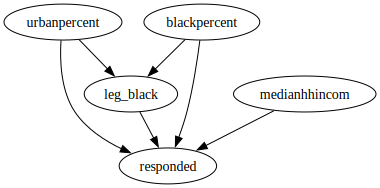

In [23]:
from causalgraphicalmodels import CausalGraphicalModel

# Define the causal graphical model
causal_graph = CausalGraphicalModel(
    nodes=["leg_black", "responded", "blackpercent", "urbanpercent", "medianhhincom"],
    edges=[
        ("leg_black", "responded"),
        ("blackpercent", "leg_black"),
        ("blackpercent", "responded"),
        ("urbanpercent", "leg_black"),
        ("urbanpercent", "responded"),
        ("medianhhincom", "responded")
    ]
)

# Visualize the causal graph
causal_graph.draw()


In [24]:
# Summary statistics for numerical variables
numerical_summary = black_politician[['blackpercent', 'urbanpercent', 'medianhhincom']].describe()

# Frequency distributions for categorical variables
categorical_distribution = {
    'leg_black': black_politician['leg_black'].value_counts(normalize=True),
    'responded': black_politician['responded'].value_counts(normalize=True),
    'south': black_politician['south'].value_counts(normalize=True)
}

# Correlation matrix for numerical variables
correlation_matrix = black_politician[['blackpercent', 'urbanpercent', 'medianhhincom']].corr()

# Print results
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Distribution:")
for key, value in categorical_distribution.items():
    print(f"{key}:\n{value}\n")
print("Correlation Matrix:\n", correlation_matrix)


Numerical Summary:
        blackpercent  urbanpercent  medianhhincom
count   5593.000000   5593.000000    5593.000000
mean       0.092231      0.678290       4.362990
std        0.154456      0.318959       1.409283
min        0.000301      0.000000       1.728300
25%        0.007702      0.424863       3.322700
50%        0.026234      0.775239       4.059600
75%        0.097552      0.985386       5.134700
max        0.974497      1.000000      13.677400

Categorical Distribution:
leg_black:
leg_black
0    0.934919
1    0.065081
Name: proportion, dtype: float64

responded:
responded
0    0.57715
1    0.42285
Name: proportion, dtype: float64

south:
south
0    0.730914
1    0.269086
Name: proportion, dtype: float64

Correlation Matrix:
                blackpercent  urbanpercent  medianhhincom
blackpercent       1.000000      0.154800      -0.246627
urbanpercent       0.154800      1.000000       0.353441
medianhhincom     -0.246627      0.353441       1.000000


In [25]:
black_politician.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   leg_black          5593 non-null   category
 1   treat_out          5593 non-null   category
 2   responded          5593 non-null   category
 3   totalpop           5593 non-null   float64 
 4   medianhhincom      5593 non-null   float64 
 5   black_medianhh     5593 non-null   float64 
 6   white_medianhh     5593 non-null   float64 
 7   blackpercent       5593 non-null   float64 
 8   statessquireindex  5593 non-null   float64 
 9   nonblacknonwhite   5593 non-null   category
 10  urbanpercent       5593 non-null   float64 
 11  leg_senator        5593 non-null   category
 12  leg_democrat       5593 non-null   category
 13  south              5593 non-null   category
dtypes: category(7), float64(7)
memory usage: 345.1 KB


In [27]:
# preprocessing: ubah tipe data
kolom_cat = ['leg_black', 'leg_senator', 'leg_democrat', 'treat_out', 'responded','nonblacknonwhite','south']
black_politician[kolom_cat] = black_politician[kolom_cat].astype('category')

In [28]:
black_politician.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5593 entries, 0 to 5592
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   leg_black          5593 non-null   category
 1   treat_out          5593 non-null   category
 2   responded          5593 non-null   category
 3   totalpop           5593 non-null   float64 
 4   medianhhincom      5593 non-null   float64 
 5   black_medianhh     5593 non-null   float64 
 6   white_medianhh     5593 non-null   float64 
 7   blackpercent       5593 non-null   float64 
 8   statessquireindex  5593 non-null   float64 
 9   nonblacknonwhite   5593 non-null   category
 10  urbanpercent       5593 non-null   float64 
 11  leg_senator        5593 non-null   category
 12  leg_democrat       5593 non-null   category
 13  south              5593 non-null   category
dtypes: category(7), float64(7)
memory usage: 345.1 KB


**Eksploratory data analysis**


In [29]:
# frequency tables dengan value_counts()
black_politician['responded'].value_counts()

responded
0    3228
1    2365
Name: count, dtype: int64

In [30]:
black_politician.describe()

,totalpop,medianhhincom,black_medianhh,white_medianhh,blackpercent,statessquireindex,urbanpercent
count,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000,5593.000000
mean,8.553139,4.362990,1.559966,2.318342,0.092231,0.190194,0.678290
std,10.787865,1.409283,0.989874,0.759254,0.154456,0.122848,0.318959
min,0.302600,1.728300,-0.117600,0.948200,0.000301,0.027000,0.000000
25%,2.660900,3.322700,1.073300,1.820100,0.007702,0.116000,0.424863
50%,4.903900,4.059600,1.413200,2.126900,0.026234,0.169000,0.775239
75%,11.554600,5.134700,1.896600,2.610200,0.097552,0.223000,0.985386
max,90.565700,13.677400,37.811500,10.660500,0.974497,0.626000,1.000000


In [31]:
kondisi = black_politician['responded'] == 0
black_politician[kondisi].describe()

,totalpop,medianhhincom,black_medianhh,white_medianhh,blackpercent,statessquireindex,urbanpercent
count,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000,3228.000000
mean,8.277239,4.310711,1.544964,2.290542,0.093296,0.181531,0.669836
std,11.346110,1.412733,1.078169,0.734608,0.157625,0.125770,0.322253
min,0.302600,1.728300,-0.117600,0.948200,0.000794,0.027000,0.000000
25%,2.357500,3.277300,1.060800,1.804375,0.007409,0.107000,0.409807
50%,4.134700,4.010400,1.395600,2.096650,0.025203,0.148000,0.767773
75%,11.073275,5.087200,1.879500,2.582775,0.097349,0.199000,0.983136
max,90.516600,13.677400,37.811500,9.004000,0.901702,0.626000,1.000000


In [32]:
kondisi = black_politician['responded'] == 1
black_politician[kondisi].describe()

,totalpop,medianhhincom,black_medianhh,white_medianhh,blackpercent,statessquireindex,urbanpercent
count,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000,2365.000000
mean,8.929716,4.434345,1.580441,2.356287,0.090777,0.202018,0.689830
std,9.965668,1.401714,0.854565,0.790236,0.150044,0.117745,0.314110
min,0.331800,1.747800,0.000000,0.981700,0.000301,0.027000,0.000000
25%,3.269900,3.402700,1.095100,1.840500,0.008273,0.125000,0.442515
50%,5.973200,4.131700,1.434800,2.158900,0.027877,0.187000,0.793737
75%,12.069600,5.173900,1.923100,2.628400,0.097908,0.244000,0.988194
max,90.565700,12.325900,12.406700,10.660500,0.974497,0.626000,1.000000


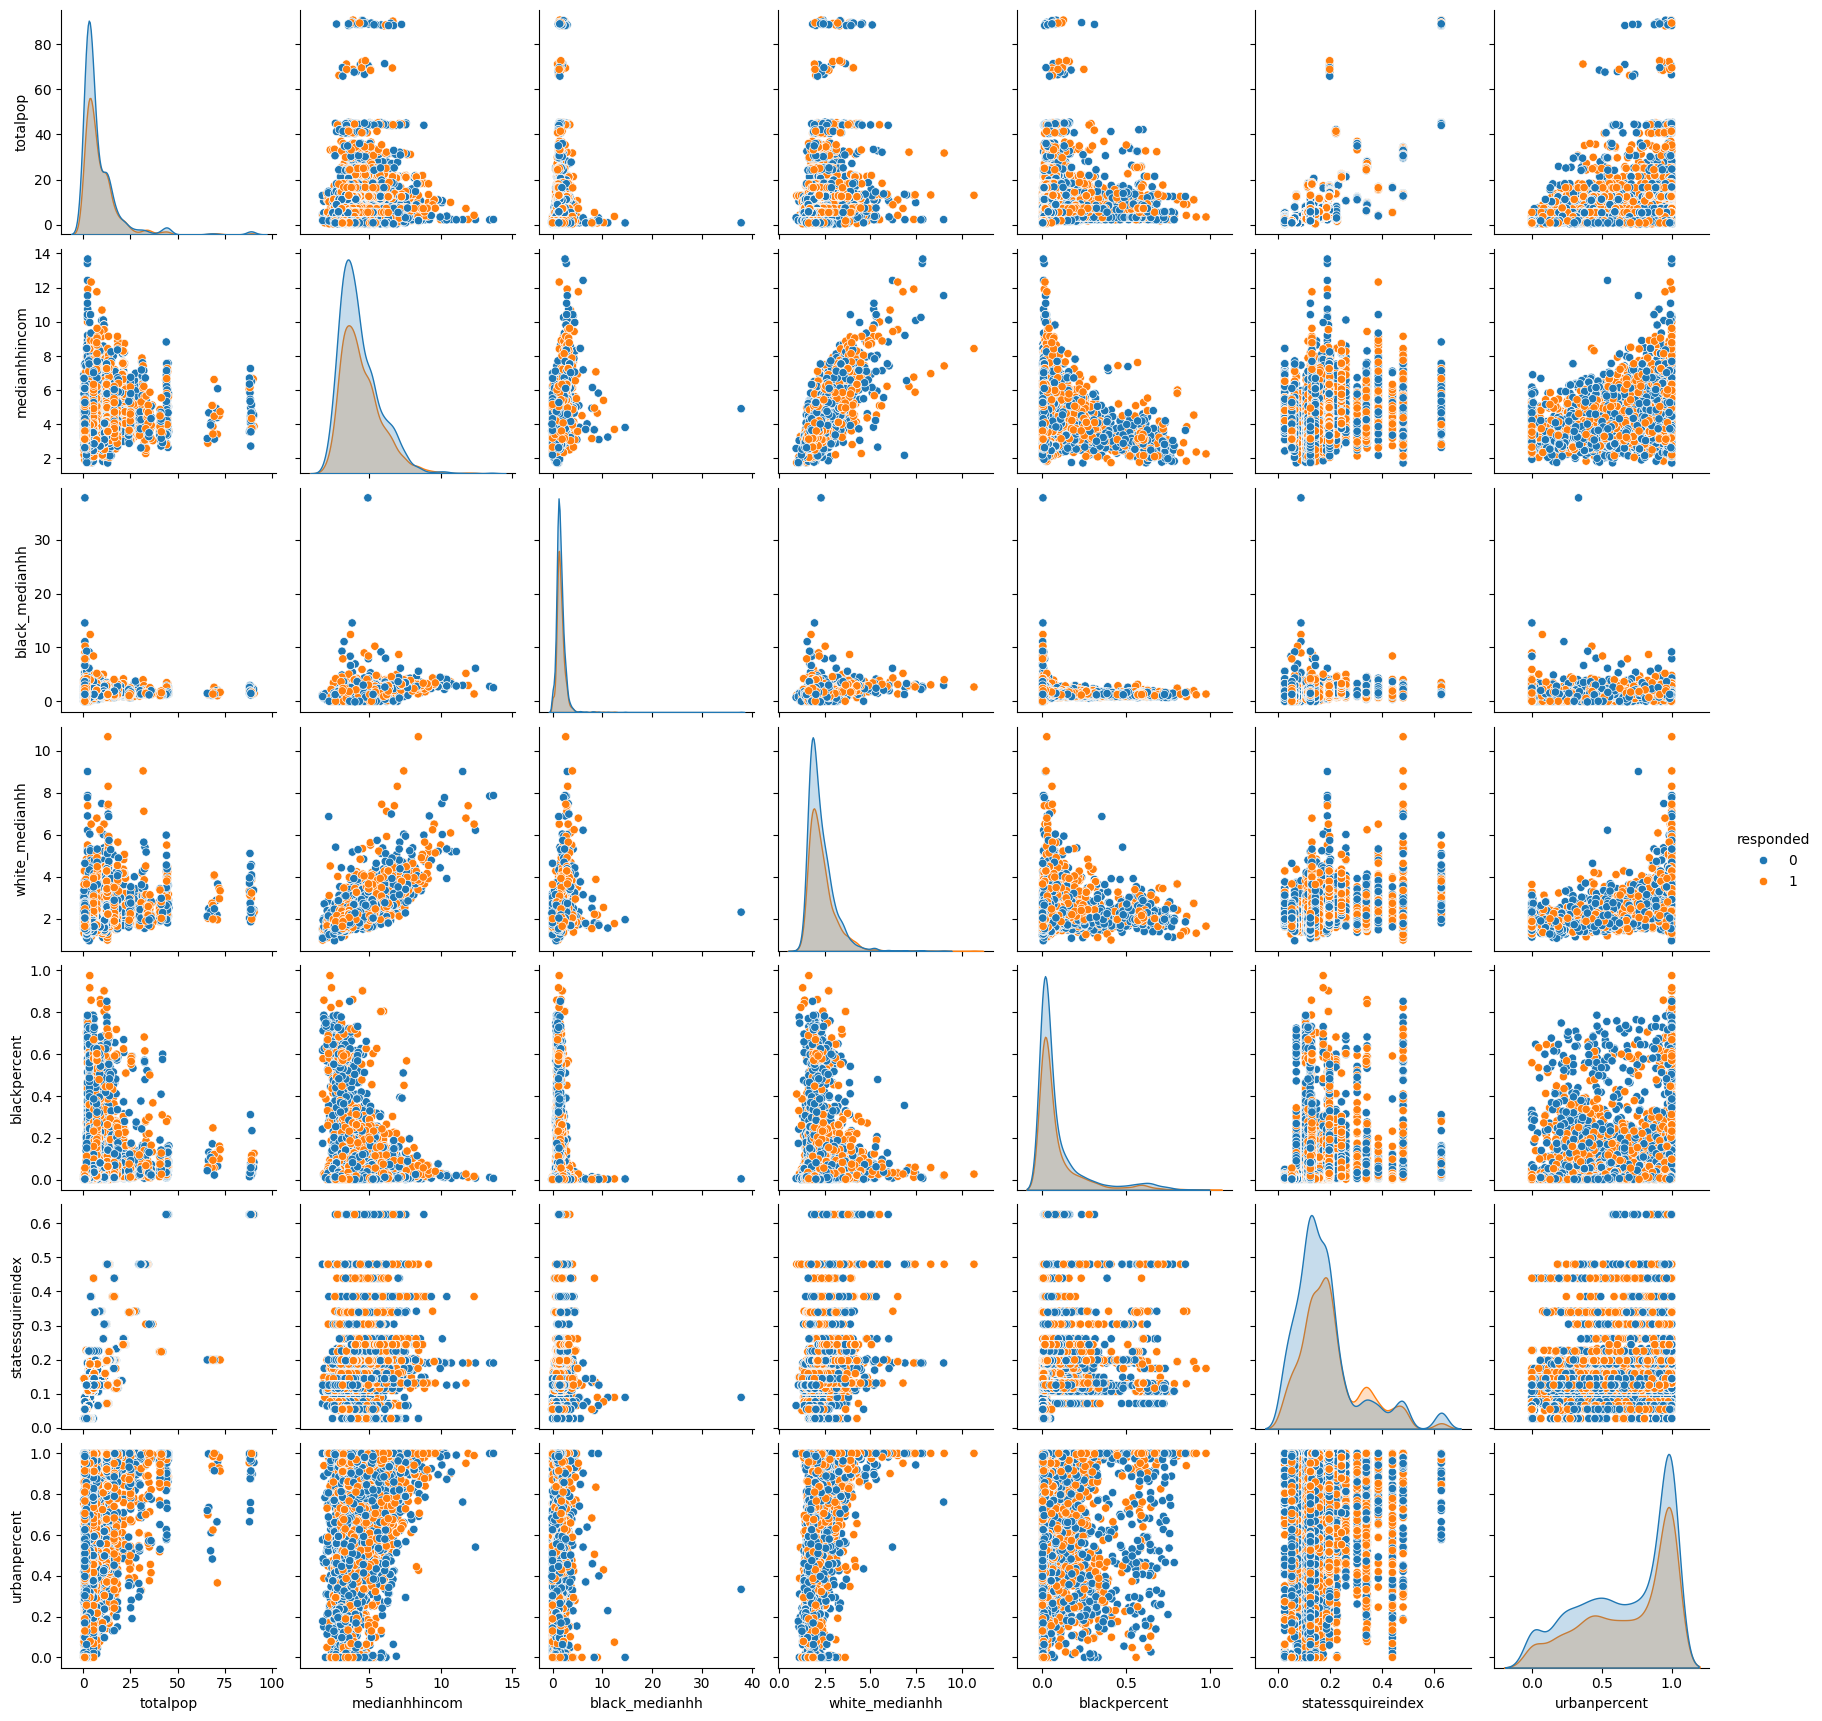

In [33]:
# melihat distribusi data dengan seaborn pairplot
sns.pairplot(data=black_politician, hue='responded')

**Estimasi efek kausal dengan menghitung Average Treatment Effect** 

Untuk mengetahui dampak treatment pada data, kita bisa menghitung ATE atau nilai rata-rata efek kausal.

In [57]:
black_politician.groupby('responded')['medianhhincom'].agg('mean')

responded
0    4.310711
1    4.434345
Name: medianhhincom, dtype: float64

In [58]:
grouped_exp = black_politician.groupby('responded')['medianhhincom'].agg(['median','mean'])

# rounding dua desimal dan menambahkan tanda dollar
grouped_exp.applymap(lambda x: f"${x:.2f}")

,median,mean
responded,,
0,$4.01,$4.31
1,$4.13,$4.43


In [59]:
# Mean Pendapatan (treated) − Mean Pendapatan (control)
ATE = 4.43 - 4.31

# (ATE/Mean pendapatan control grup) * 100 
ATE_percentage = (ATE/4.31) * 100
print('ATE: $'+ str(round(ATE,2)))
print('ATE in percentage:' + str(round(ATE_percentage,2)) + "%")

ATE: $0.12
ATE in percentage:2.78%


**Kesimpulan**
- Ada peningkatan rata-rata pendapatan rumah tangga sebesar $0.12 ribu (120 dolar) pada kelompok yang merespons dibandingkan yang tidak.
- Peningkatan ini sekitar 2.78% lebih tinggi dibandingkan kelompok kontrol.

In [50]:
import statsmodels.formula.api as smf

# Fit the linear regression model using formula
# formula: 'response_variable ~ predictor'
model_exp = smf.ols(' medianhhincom~ responded', data=black_politician)
result_exp = model_exp.fit()

# Show the summary of the model
print(result_exp.summary())

                            OLS Regression Results                            
Dep. Variable:          medianhhincom   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     10.52
Date:                Mon, 17 Feb 2025   Prob (F-statistic):            0.00119
Time:                        11:37:34   Log-Likelihood:                -9849.2
No. Observations:                5593   AIC:                         1.970e+04
Df Residuals:                    5591   BIC:                         1.972e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3107      0.025    173.

In [51]:
result_exp.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.3107,0.025,173.935,0.000,4.262,4.359
responded[T.1],0.1236,0.038,3.244,0.001,0.049,0.198


In [52]:
result_exp.summary().tables[2]

Omnibus:,1122.650,Durbin-Watson:,0.898
Prob(Omnibus):,0.000,Jarque-Bera (JB):,2371.978
Skew:,1.172,Prob(JB):,0.00
Kurtosis:,5.165,Cond. No.,2.48


In [53]:
p_value = float(result_exp.summary().tables[1].data[2][4])
print('p_value:', p_value)

p_value: 0.001


Interpretasi:
    
* $\alpha$:
  + tingkat signifikansi / tingkat error
  + umumnya 0.05
* $1-\alpha$: tingkat kepercayaan (misal alpha 0.05, maka kita akan percaya terhadap hasil analisis sebesar 95%)
* $p-value$:
  + akan dibandingkan dengan alpha untuk untuk mengambil keputusan
  + peluang data sampel berada pada bagian sangat ekstrim/berbeda signifikan dengan keadaan normal.
  
$H_0$: koefisien = 0, variabel tidak berpengaruh terhadap outcome/target

$H_1$: koefisien != 0, variabel berpengaruh terhadap outcome/target

Pengambilan keputusan:

* Jika $p-value$ < $\alpha$, maka tolak $H_0$ / terima $H_1$
* Jika $p-value$ > $\alpha$, maka gagal tolak / terima $H_0$

In [54]:
alpha = 0.05        

if p_value < alpha:
    print("Tolak H0, artinya, variabel berpengaruh terhadap outcome")
else:
    print("Gagal tolak H0,  artinya, variabel tidak berpengaruh terhadap outcome")

Tolak H0, artinya, variabel berpengaruh terhadap outcome


Kesimpulan : 

